# Study type distribution quality control


The goal of this notebook is to check the distribution of study types in the dataset. 

## Data Loading

The data required for this analysis is loaded from the `computed maf` dataset.

In [ ]:
from gentropy.common.session import Session
from pyspark.sql import functions as f

from manuscript_methods import group_statistics, plot_group_statistics
from manuscript_methods.datasets import LeadVariantEffect


In [2]:
session = Session(extended_spark_conf={"spark.driver.memory": "40G"})
lead_maf_dataset_path = "../../data/lead-maf-vep"


25/06/22 14:47:17 WARN Utils: Your hostname, mindos resolves to a loopback address: 127.0.1.1; using 192.168.0.100 instead (on interface eno1)
25/06/22 14:47:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/22 14:47:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/06/22 14:47:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/06/22 14:47:18 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/06/22 14:47:18 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/06/22 14:47:18 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
25/06/22 14:47:18 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.


In [3]:
session.spark


In [4]:
dataset_maf = LeadVariantEffect.from_parquet(session, lead_maf_dataset_path)
dataset = dataset_maf.df.select(
    "studyLocusId",
    "studyStatistics.studyType",
)


In [5]:
dataset.describe().show()


+-------+--------------------+---------+
|summary|        studyLocusId|studyType|
+-------+--------------------+---------+
|  count|             2833758|  2833758|
|   mean|            Infinity|     NULL|
| stddev|                 NaN|     NULL|
|    min|0000075e718162e97...| cis-pqtl|
|    max|fffffef27b8b270d5...|    tuqtl|
+-------+--------------------+---------+



## Plot the distribution of study types

<img src="plots/01.4_study_type_distribution.jpg" width="600">

+----------+-------+-----+
| studyType|  count|    %|
+----------+-------+-----+
|      eqtl|1349478|47.62|
|      gwas| 789453|27.86|
|     tuqtl| 384852|13.58|
|      sqtl| 223500| 7.89|
|    sceqtl|  52744| 1.86|
|trans-pqtl|  17678| 0.62|
|  cis-pqtl|  16053| 0.57|
+----------+-------+-----+



/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 5.35 x 4.5 in image.
/home/mindos/Projects/OpenTargets/Gentropy-manuscript/.venv/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: plots/01.4_study_type_distribution.jpg


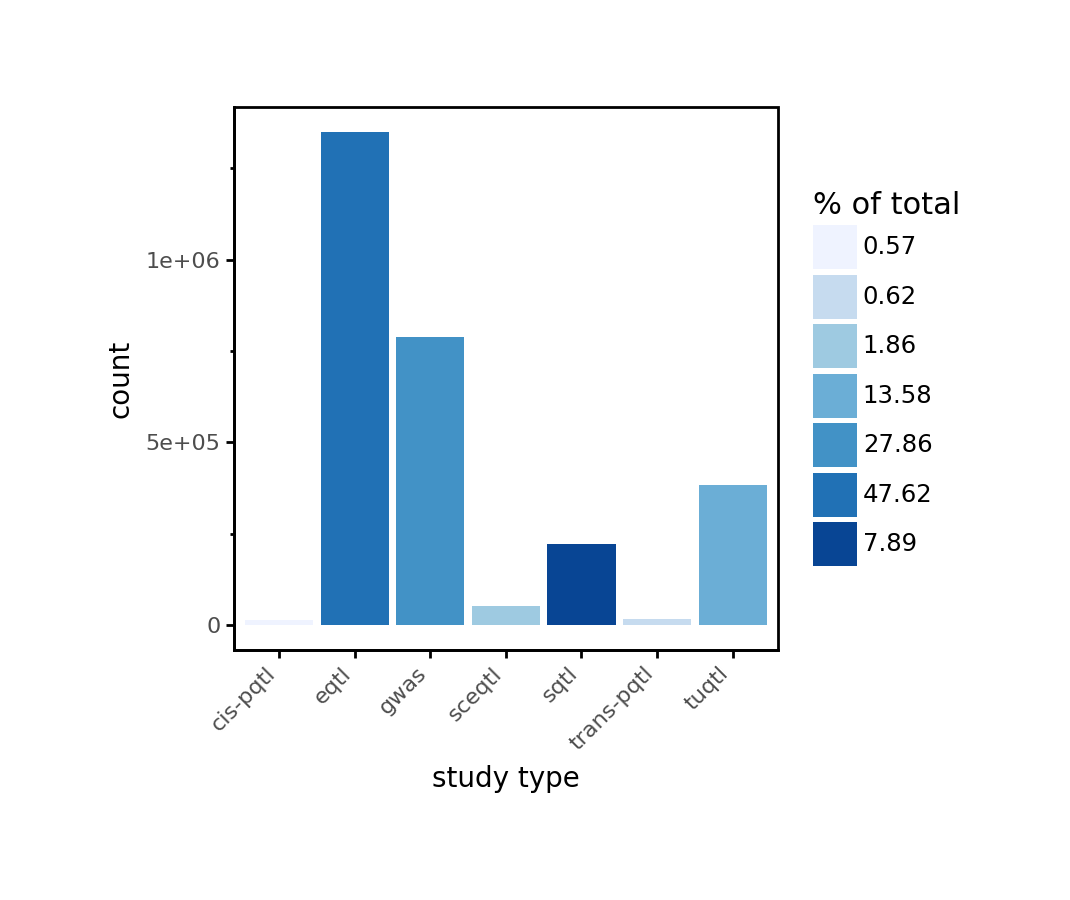

In [ ]:
grouped_data = group_statistics(
    dataset_maf.df.select(
        "studyLocusId",
        "variantId",
        "locusStatistics.locusSize",
        "studyStatistics.studyType",
    ),
    f.col("studyType"),
).orderBy(f.desc("count"))
grouped_data.show()

plot = plot_group_statistics(grouped_data, "studyType", "count", "%", "study type")
plot.save("plots/01.4_study_type_distribution.jpg", dpi=300, bbox_inches="tight")
plot
